In [ ]:
#City-Level Comparative Analysis(Mumbai vs Thane)


#Objective:
# Compare investment opportunities in Mumbai and Thane by analyzing differences in:
#Property types
#Carpet Area
#prices

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set Seaborn style for cleaner plots
sns.set(style='whitegrid')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/cleaned_real_estate_data.csv')

In [4]:
mumbai_df = df[df['city'].str.lower() == 'mumbai']
thane_df = df[df['city'].str.lower() == 'thane']

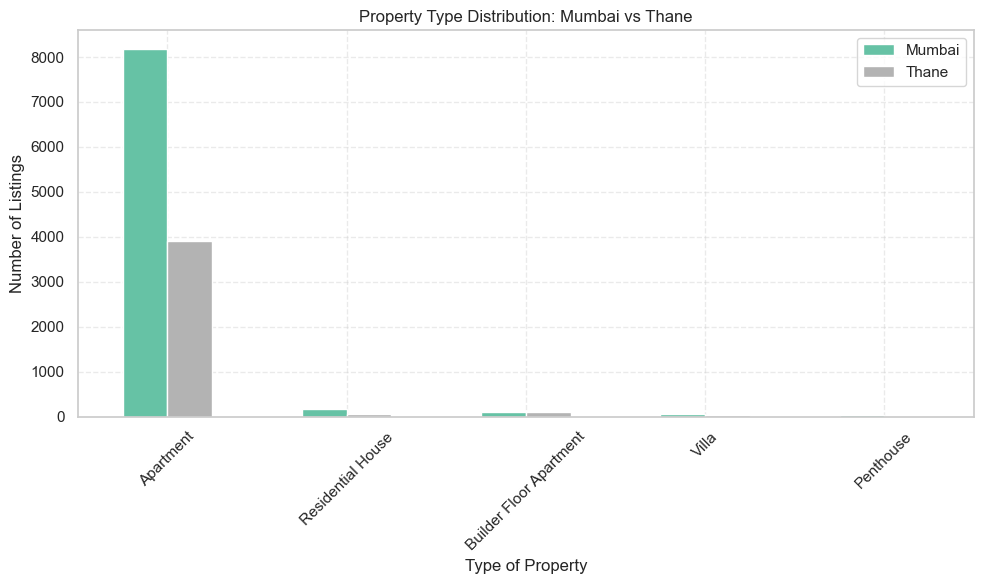

In [5]:
type_counts = pd.concat([
    mumbai_df['type_of_property'].value_counts().rename('Mumbai'),
    thane_df['type_of_property'].value_counts().rename('Thane')
], axis=1).fillna(0)

type_counts.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Property Type Distribution: Mumbai vs Thane')
plt.xlabel('Type of Property')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

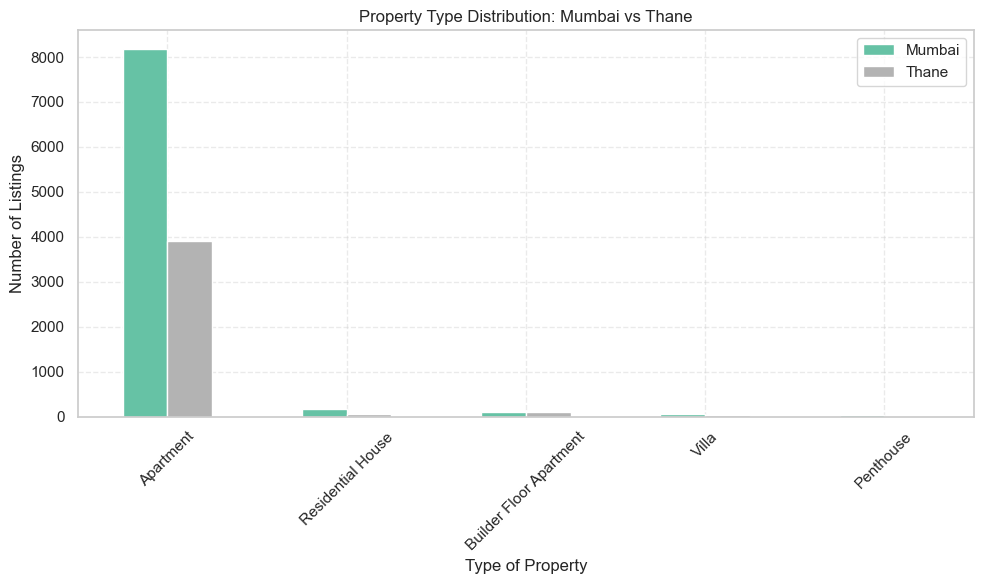

In [6]:
#compare property type distribution

type_counts = pd.concat([
    mumbai_df['type_of_property'].value_counts().rename('Mumbai'),
    thane_df['type_of_property'].value_counts().rename('Thane')
], axis=1).fillna(0)

type_counts.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Property Type Distribution: Mumbai vs Thane')
plt.xlabel('Type of Property')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

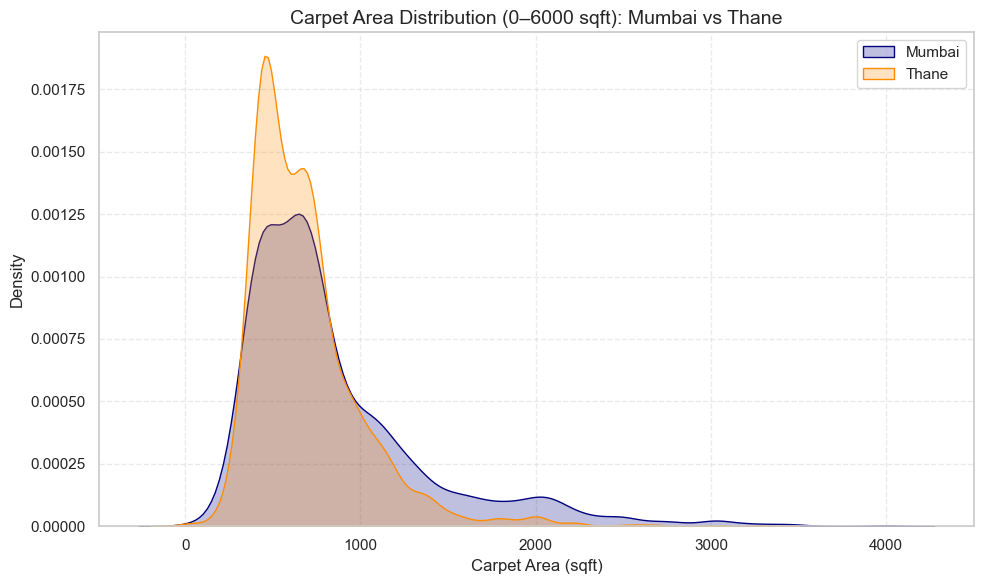

In [12]:
#compare carpet area distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Filter carpet area range
mumbai_filtered = mumbai_df[(mumbai_df['carpet_area'] > 0) & (mumbai_df['carpet_area'] <= 4000)]
thane_filtered = thane_df[(thane_df['carpet_area'] > 0) & (thane_df['carpet_area'] <= 4000)]

# Plot KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(mumbai_filtered['carpet_area'], label='Mumbai', shade=True, color='navy')
sns.kdeplot(thane_filtered['carpet_area'], label='Thane', shade=True, color='darkorange')

plt.title('Carpet Area Distribution (0–6000 sqft): Mumbai vs Thane', fontsize=14)
plt.xlabel('Carpet Area (sqft)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

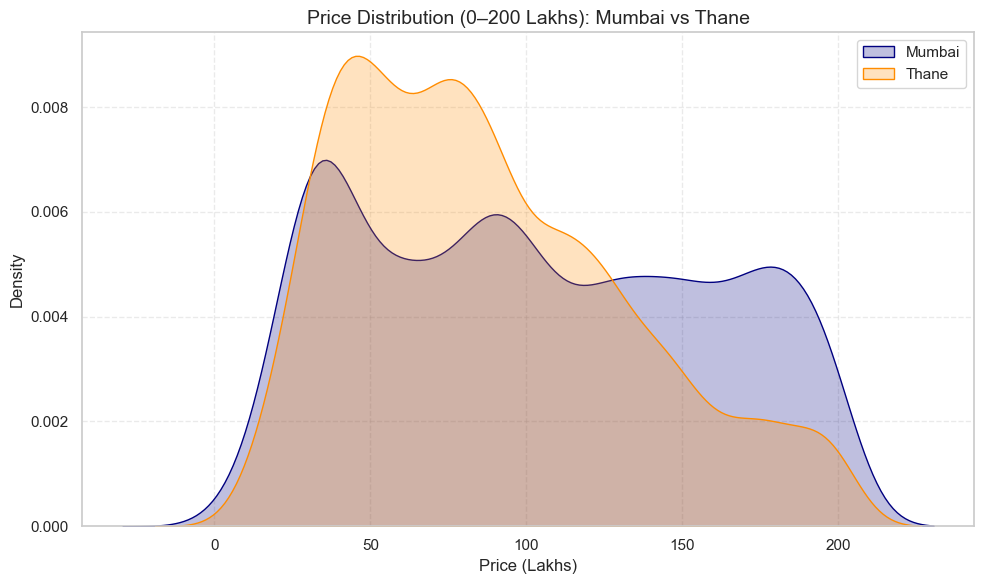

In [13]:
#compare price distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Filter price range
mumbai_filtered = mumbai_df[(mumbai_df['price_lakhs'] > 0) & (mumbai_df['price_lakhs'] <= 200)]
thane_filtered = thane_df[(thane_df['price_lakhs'] > 0) & (thane_df['price_lakhs'] <= 200)]

# Plot KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(mumbai_filtered['price_lakhs'], label='Mumbai', shade=True, color='navy')
sns.kdeplot(thane_filtered['price_lakhs'], label='Thane', shade=True, color='darkorange')

plt.title('Price Distribution (0–200 Lakhs): Mumbai vs Thane', fontsize=14)
plt.xlabel('Price (Lakhs)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

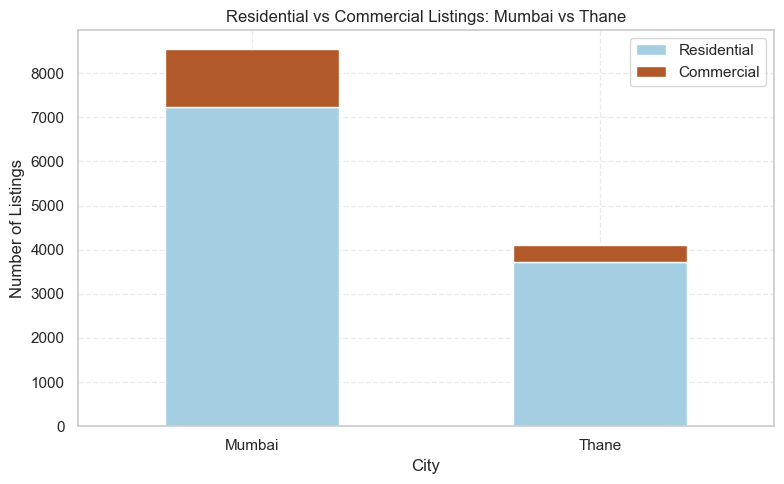

In [9]:
#commercial vs residential breakdown

segment_counts = df[df['city'].isin(['Mumbai', 'Thane'])].groupby(['city', 'commercial']).size().unstack().fillna(0)
segment_counts.columns = ['Residential', 'Commercial']

segment_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')
plt.title('Residential vs Commercial Listings: Mumbai vs Thane')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
#Additional Insights starts from below


In [ ]:
#Additional Insights starts from below

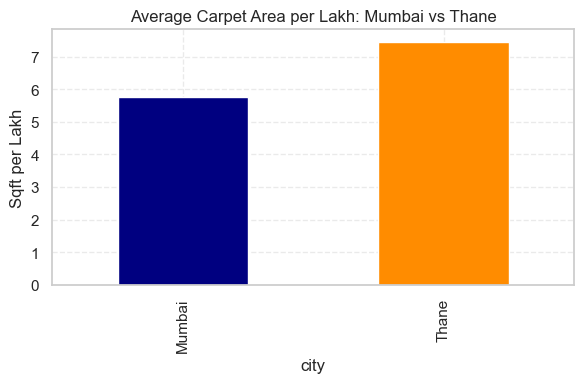

In [14]:
#Additional Insights(apart from asked in question)
#Carpet Area per lakh
df['carpet_per_lakh'] = df['carpet_area'] / df['price_lakhs']

efficiency = df[df['city'].isin(['Mumbai', 'Thane'])].groupby('city')['carpet_per_lakh'].mean().round(2)

efficiency.plot(kind='bar', color=['navy', 'darkorange'], figsize=(6, 4))
plt.title('Average Carpet Area per Lakh: Mumbai vs Thane')
plt.ylabel('Sqft per Lakh')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

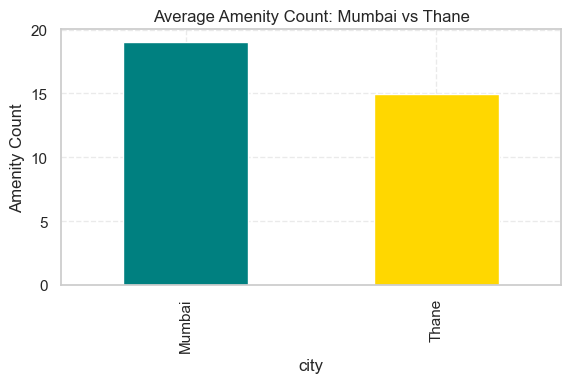

In [15]:
#Amenity Richness
amenity_avg = df[df['city'].isin(['Mumbai', 'Thane'])].groupby('city')['amenity_count'].mean().round(2)

amenity_avg.plot(kind='bar', color=['teal', 'gold'], figsize=(6, 4))
plt.title('Average Amenity Count: Mumbai vs Thane')
plt.ylabel('Amenity Count')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

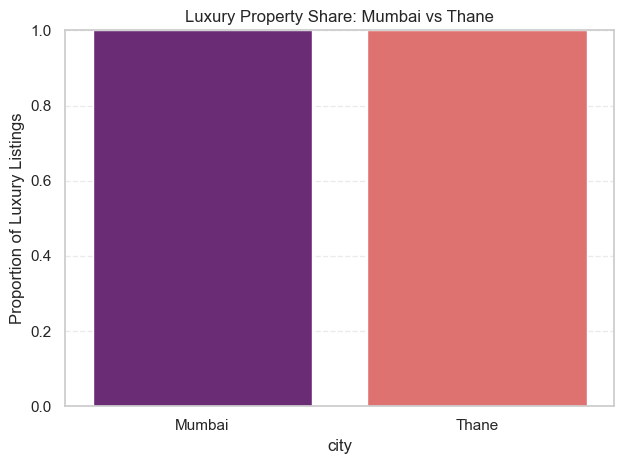

In [16]:
#Luxury property share

luxury_share = df[df['city'].isin(['Mumbai', 'Thane'])].groupby('city')['is_luxury'].mean().round(2).reset_index()

sns.barplot(x='city', y='is_luxury', data=luxury_share, palette='magma')
plt.title('Luxury Property Share: Mumbai vs Thane')
plt.ylabel('Proportion of Luxury Listings')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

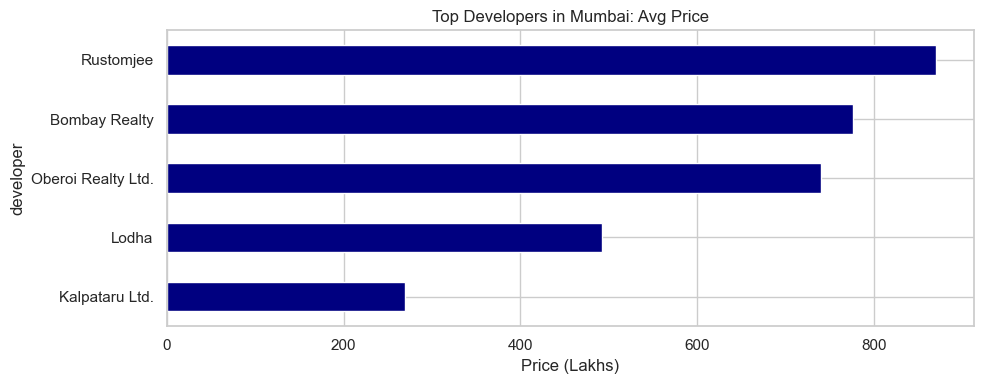

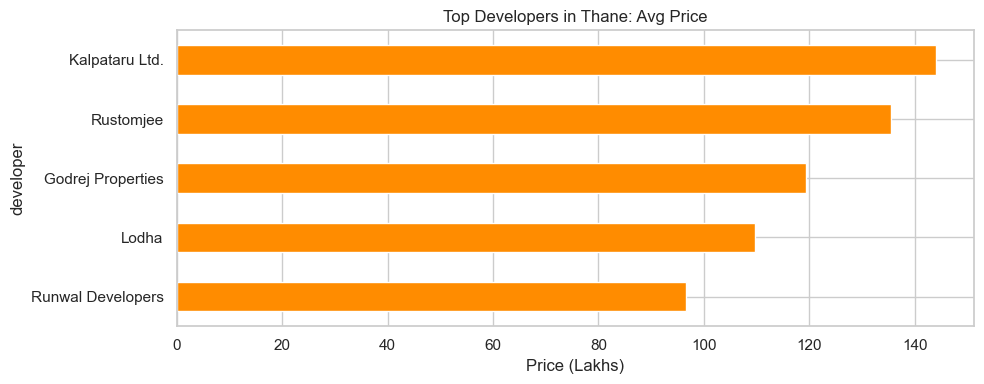

In [18]:
#developer influence

top_devs_mumbai = mumbai_df['developer'].value_counts().nlargest(5).index
top_devs_thane = thane_df['developer'].value_counts().nlargest(5).index

dev_price_mumbai = mumbai_df[mumbai_df['developer'].isin(top_devs_mumbai)].groupby('developer')['price_lakhs'].mean().sort_values()
dev_price_thane = thane_df[thane_df['developer'].isin(top_devs_thane)].groupby('developer')['price_lakhs'].mean().sort_values()

plt.figure(figsize=(10, 4))
dev_price_mumbai.plot(kind='barh', color='navy')
plt.title('Top Developers in Mumbai: Avg Price')
plt.xlabel('Price (Lakhs)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
dev_price_thane.plot(kind='barh', color='darkorange')
plt.title('Top Developers in Thane: Avg Price')
plt.xlabel('Price (Lakhs)')
plt.tight_layout()
plt.show()

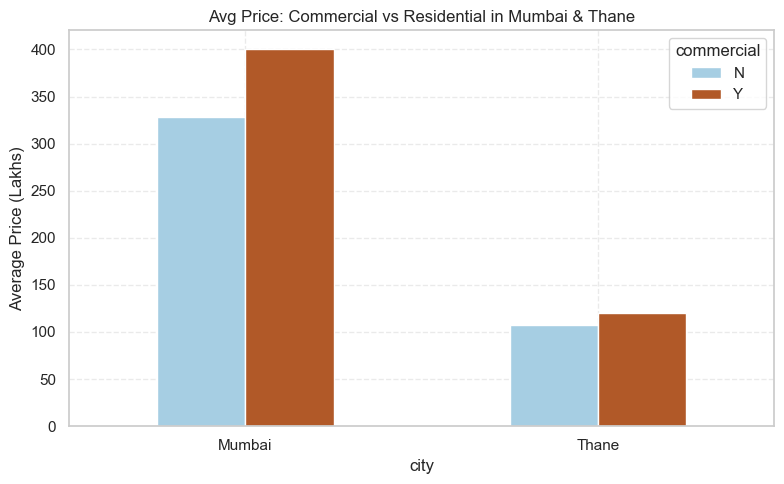

In [19]:
#Comercial vs residential pricing

pricing_commercial = df[df['city'].isin(['Mumbai', 'Thane'])].groupby(['city', 'commercial'])['price_lakhs'].mean().unstack().round(2)

pricing_commercial.plot(kind='bar', figsize=(8, 5), colormap='Paired')
plt.title('Avg Price: Commercial vs Residential in Mumbai & Thane')
plt.ylabel('Average Price (Lakhs)')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
#Mumbai offers a wider range of property types, with a strong presence in luxury and high-end segments. Carpet areas tend to be more compact, but prices are significantly higher—reflecting premium urban demand.
#Thane shows larger carpet areas on average and more affordable pricing, making it attractive for mid-range and spacious residential investments. Commercial listings are also more evenly distributed.
